# Simple Linear Regression Assignment 

### Data Set : delivery_time 
Q = Predict delivery time using sorting time

# 1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
time_pickup = pd.read_csv('delivery_time.csv')
time_pickup

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3. Data Understanding

## a)  Initial Analysis :

In [3]:
time_pickup.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
time_pickup.shape

(21, 2)

In [5]:
time_pickup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
time_pickup.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
time_pickup.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

##### There is no Null value present in this data set and also the data types are appropriate in all attributes

In [8]:
time_pickup_1 = time_pickup.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis = 1)
time_pickup_1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# b)  Correlation Matrix :

In [9]:
corr_matrix = time_pickup_1.corr()
corr_matrix

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


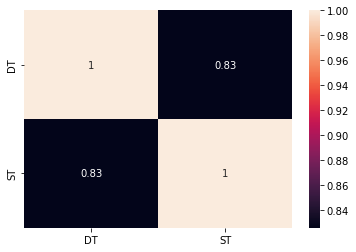

In [10]:
sns.heatmap(data = corr_matrix,annot = True)
plt.show()

##### |r| > 0.8, hence there is a strong positive relation between Delivery Time and Sorting Time

# 5. Perform Assumption Check 

## a)  Outlier Test Using Box Plot :

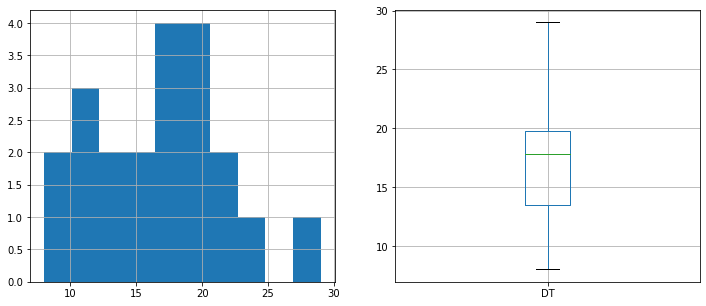

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
time_pickup_1['DT'].hist()
plt.subplot(1,2,2)
time_pickup_1.boxplot(column = ['DT'])
plt.show()

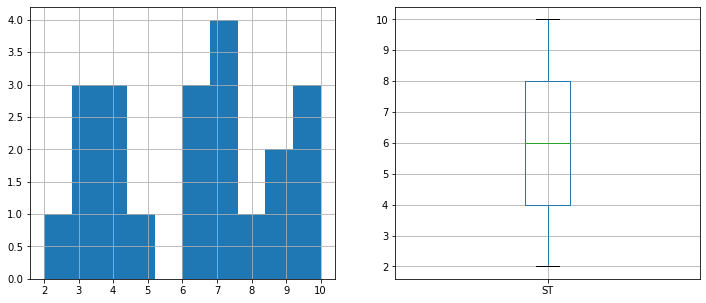

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
time_pickup_1['ST'].hist()
plt.subplot(1,2,2)
time_pickup_1.boxplot(column = ['ST'])
plt.show()

##### From the above histogrms and boxplots, we found that there is no outleirs present inside the DT(Delivery Time) and ST (Sorting Time) variable.

## b)   Normality / Distribution Test Using Distplot :

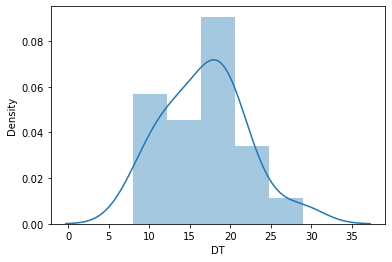

In [13]:
sns.distplot(time_pickup_1['DT'])
plt.show()

### DT is a Positive Skew & Asymmetrical Distribution

##### Normality Test Failed

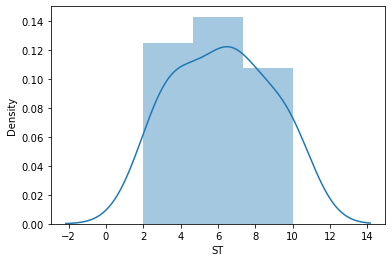

In [14]:
sns.distplot(time_pickup_1['ST'])
plt.show()

### ST is a Zero Skew  &   Symmetrical Distribution

# 

# 7. Model Building || 8. Model Training 

### Now Try To Fit Model For Delivery Time [DT]  Because It Is a Asymmetrical Distribution 

# Model 1: Without Applying any Transformation
Using Statsmodel

In [15]:
time_model_1 = smf.ols(formula = 'DT~ST',data = time_pickup_1).fit()
time_model_1

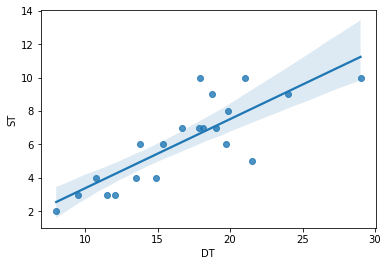

In [16]:
sns.regplot(x ='DT',y ='ST',data=time_pickup_1)
plt.show()

In [17]:
#coefficient
time_model_1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [18]:
time_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        00:32:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the Above OLS Regression Result the R-Squared value is 0.682 < 0.75 and this Model is Not Good to Predict Delivery Time [DT]  and p-value < 0.05

# 9. Model Testing

In [19]:
pred_1 = time_model_1.predict(time_pickup_1.ST)
pred_1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [20]:
actual_1 = time_pickup_1.DT

In [21]:
rmse = sqrt(mean_squared_error(actual_1,pred_1))
print(rmse)

2.7916503270617654


# Model 2: Apply Exponential Transformation

In [22]:
time_model_2 = smf.ols(formula = 'DT~np.exp(ST)',data = time_pickup_1).fit()
time_model_2

In [23]:
time_model_2.params

Intercept     15.083578
np.exp(ST)     0.000393
dtype: float64

In [24]:
time_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 24 Sep 2022   Prob (F-statistic):            0.00396
Time:                        00:32:43   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 3: Apply Reciprocal Transformation

In [25]:
time_model_3 = smf.ols(formula = 'DT~np.reciprocal(ST)',data = time_pickup_1).fit()
time_model_3

In [26]:
time_model_3.params

Intercept            16.790952
np.reciprocal(ST)     0.000000
dtype: float64

In [27]:
time_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 24 Sep 2022   Prob (F-statistic):                nan
Time:                        00:32:45   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(ST)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model 4: Apply Square Transformation

In [28]:
time_model_4 = smf.ols(formula = 'DT~np.square(ST)',data = time_pickup_1).fit()
time_model_4

In [29]:
time_model_4.params

Intercept        11.237205
np.square(ST)     0.124870
dtype: float64

In [30]:
time_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.74e-05
Time:                        00:32:47   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
np.square(ST)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 5: Apply Square Root Transformation

In [31]:
time_model_5 = smf.ols(formula = 'DT~np.sqrt(ST)',data = time_pickup_1).fit()
time_model_5

In [32]:
time_model_5.params

Intercept     -2.518837
np.sqrt(ST)    7.936591
dtype: float64

In [33]:
time_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.61e-06
Time:                        00:32:48   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(ST)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 6: Apply Log Transformation of Y

In [34]:
time_model_6 = smf.ols(formula = 'DT~np.log(ST)',data = time_pickup_1).fit()
time_model_6

In [35]:
time_model_6.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [36]:
time_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        00:32:50   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 7: Apply Log Transformation of X

In [37]:
time_model_7 = smf.ols(formula = 'np.log(DT)~ST',data = time_pickup_1).fit()
time_model_7

In [38]:
time_model_7.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [39]:
time_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                        00:32:51   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 8: Apply Log Transformation of X & Y

In [40]:
time_model_8 = smf.ols(formula = 'np.log(DT)~np.log(ST)',data = time_pickup_1).fit()
time_model_8

In [41]:
time_model_8.params

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64

In [42]:
time_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.60e-07
Time:                        00:32:53   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CONCLUSION = Comparing between all Models , model_8 has Higher R-squared Value i.e. 0.772 as comapare to other Models. 

## Hence the Model_8 is better Model to Predict Delivery_Time

# 

# THE END